### 가설검정


In [1]:
import os
import warnings 
warnings.simplefilter(action='ignore',category=FutureWarning)

import pandas as pd
import numpy as np
import math
import scipy.stats as st
from scipy import stats

#시각화 패키지
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#os에 따른 깨짐 문제
if os.name == 'nt':
    font_family = "Malgun Gothic"
else:
    font_family ="AppleGothic"

#값 깨지는 문제 해결 위해 파라미터 설정
sns.set(font=font_family, rc={"axes.unicode_minus":False})

In [3]:
# 기각값 
z_95 = stats.norm.ppf(0.95)
print(z_95)

1.6448536269514722


- 검정 통계량(z)


In [5]:
# 변이 분석
n = 100
m_u = 70
m_sigma = 8.9
hysis_u = 71.798

#검정 통계량 계산
z = (hysis_u - m_u) / (m_sigma / np.sqrt(n))
print(z)

# print(2 * stats.norm().sf(np.abs(z))) #유의확률

2.0202247191011256


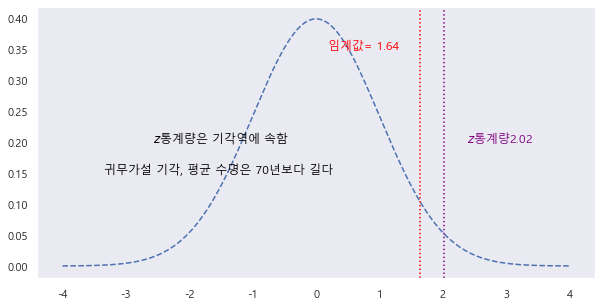

In [8]:
#시각화
xx = np.linspace(-4,4,1000)
black = {"facecolor":"black"}
plt.figure(figsize=(10,5))

pdf_norm = stats.norm.pdf(xx)
plt.plot(xx, pdf_norm, 'b--')

#95% 임계값 표시
plt.axvline(x=z_95, color='red', linestyle=':')
plt.text(0.75, .35, '임계값= ' + str(round(z_95, 2)),
        horizontalalignment='center', color='red')

#위에서 구한 카이분포 통계값 = z통계량
plt.axvline(x =z, color='purple', linestyle=':')
plt.text(2.9, .2, '$z$통계량' + str(round(z,2)),
        horizontalalignment='center',color='purple')
plt.text(-1.5, .2, '$z$통계량은 기각역에 속함',
        horizontalalignment='center',color='black')
plt.text(-1.5, .15, '귀무가설 기각, 평균 수명은 70년보다 길다 ',
         horizontalalignment='center',color='black')
plt.grid()
plt.show()

- 기각값

In [9]:
# 변이 분석
n = 12
s_mu = 42
s_sigma = 11.9
hysis_mu = 46

# 95% 좌측검정 기각값, df:자유도
t_95 = -1 * stats.t.ppf(0.95, df = n-1) # 좌측검정 * -1
print(t_95)

-1.7958848187036691


In [11]:
# 통계량 t값 계산
t_value = (s_mu - hysis_mu) / (s_sigma / np.sqrt(n))
print(t_value)

-1.1644039042479846


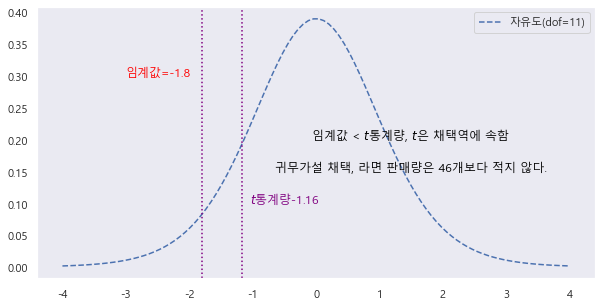

In [17]:
# 시각화
t_data = np.linspace(-4, 4, 100)
t_dist = stats.t(df = n-1)

black = {"facecolor":"black"}
plt.figure(figsize=(10,5))

t_dist = stats.t(df=n-1)
plt.plot(t_data, t_dist.pdf(t_data), 'b--', label=("자유도(dof=%d)" % 11))

plt.axvline(x=t_95, color='purple', linestyle=':')
plt.text(-2.5, .3, '임계값=' + str(round(t_95, 2)),
        horizontalalignment='center', color='red')

#위에서 구한 카이분포 통계값 = z통계량
plt.axvline(x=t_value, color='purple', linestyle=':')
plt.text(-0.5, .1, '$t$통계량' + str(round(t_value,2)),
        horizontalalignment='center',color='purple')
plt.text(1.5, .2, '임계값 < $t$통계량, $t$은 채택역에 속함 ',
        horizontalalignment='center',color='black')
plt.text(1.5, .15, '귀무가설 채택, 라면 판매량은 46개보다 적지 않다.',
         horizontalalignment='center',color='black')
plt.grid()
plt.legend()
plt.show()

In [18]:
# 변이 분석
n = 12
s_mu = 42
s_sigma = 11.9
hysis_mu = 46

# 95% 좌측검정 기각값, df:자유도
t_95 = round( -1 * stats.t.ppf(0.95, df = n-1), 3) # 좌측검정 * -1
print("기각값: ",t_95)

#통계량 t값 꼐산(
t_value = (s_mu - hysis_mu) / (s_sigma / np.sqrt(n))
print('t통계량 :', round(t_value,3))

기각값:  -1.796
t통계량 : -1.164


In [19]:
# p_value(유의확률) 계산
round(stats.t(df=11).cdf(t_value),3)

0.134

Text(-3, 0.25, '검정통계량 t= -1.164(유의확률 0.13)')

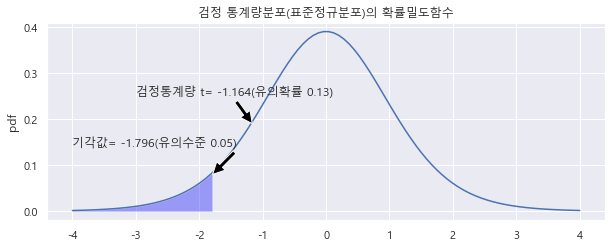

In [24]:
# 시각화
norm_rv = stats.t(df=11)

xx= np.linspace(-4, 4, 100)
plt.figure(figsize=(10, 8))
plt.subplot(211)
plt.plot(xx, norm_rv.pdf(xx))
plt.ylabel("pdf")
plt.title('검정 통계량분포(표준정규분포)의 확률밀도함수')
black = {"facecolor":"black"}

#기각값 text
plt.annotate('기각값= -1.796(유의수준 0.05)', xy=(-1.79, 0.08), xytext=(-4, 0.14), arrowprops=black)

#기각값 면적
xx2= np.linspace(-4, -1.796, 100)
plt.fill_between(xx2, norm_rv.pdf(xx2), facecolor='blue', alpha=0.35)

# p-value test
plt.annotate('검정통계량 t= -1.164(유의확률 0.13)', xy=(-1.164, 0.19), xytext=(-3, 0.25), arrowprops=black)

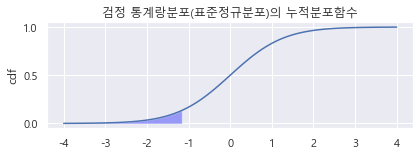

In [27]:
# p-value(유의확률) 면적
xx3 = np.linspace(-4, -1.164, 100)
plt.fill_between(xx3, norm_rv.pdf(xx3), facecolor='red',alpha=0.35)

plt.text(1, .15, '$(a= 0.05) < (P-value = 0.134)$',
        horizontalalignment='center', color='red')
plt.text(1, .10, '$P$값이 유의수준보다 크므로 $H_0$ 기각되지 않는다.',
         horizontalalignment='center', color='red')
plt.text(1, .05, '결론: 라면 판매량은 46개보다 적지 않다',
        horizontalalignment='center', color='red')

#누적분포도
plt.subplot(212)
plt.plot(xx, norm_rv.cdf(xx))

plt.fill_between(xx3, norm_rv.cdf(xx3), facecolor='blue',alpha=0.35)
plt.ylabel('cdf')
plt.title("검정 통계랑분포(표준정규분포)의 누적분포함수")
plt.tight_layout()
plt.show()